In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
#EDA and Data visualiztion

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

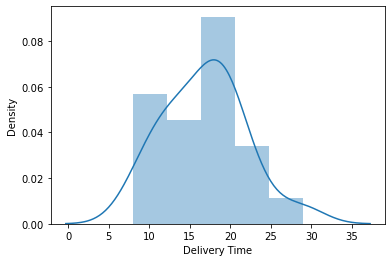

In [5]:
sns.distplot(dataset['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

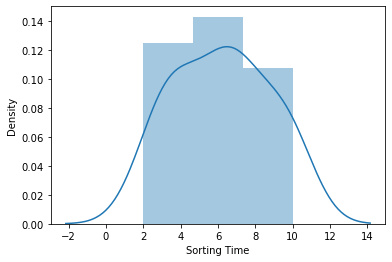

In [6]:
sns.distplot(dataset['Sorting Time'])

In [7]:
#Renaming columns

In [8]:
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
#Correlation analysis

In [10]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

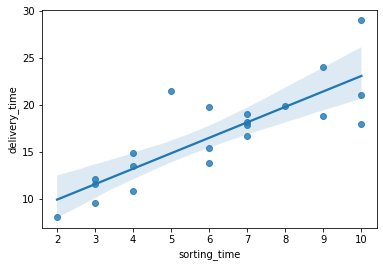

In [11]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

In [12]:
#Model building

In [13]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

In [14]:
#Model testing

In [15]:
#Finding tvalues and pvalues

In [16]:
model.tvalues,model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [17]:
#Finding Rsquared values

In [18]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [19]:
#Model predictions
#Manual prediction for say sorting time 5

In [20]:
delivery_time=(6.582734)+(1.649020)*(5)
delivery_time

14.827834

In [21]:
#Automatic prediction for say sorting time 5,8

In [22]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [23]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [24]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [34]:
#Fitting a Linear Regression Model
#Using Ordinary least squares (OLS) regression
#It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line

In [36]:
model = smf.ols('delivery_time~sorting_time', data = dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           3.98e-06
Time:                        20:45:56   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#As you can notice in the above model
#The R-squared and Adjusted R-squared scores are still below 0.85.
#(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
#Lets Try some data transformation to check whether these scores can get any higher than this.

In [38]:
model2 = smf.ols('np.cbrt(delivery_time)~np.cbrt(sorting_time)', data = dataset).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Fri, 14 Jul 2023   Prob (F-statistic):           4.90e-07
Time:                            20:48:39   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#As you can notice in the above model
#After Cueb root transformation on the Data, R-squared and Adjusted R-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.
#Lets Try other data transformation to check whether these scores can get any higher than this.

In [40]:
model3 = smf.ols('np.log(delivery_time)~np.log(sorting_time)', data = dataset).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Fri, 14 Jul 2023   Prob (F-statistic):           1.60e-07
Time:                           20:49:37   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Model Testing
#As Y = Beta0 + Beta1*(X)
#Finding Coefficient Parameters (Beta0 and Beta1 values)

In [41]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [42]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [43]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [25]:
#Log transformation

In [32]:
from sklearn.metrics import mean_squared_error

In [44]:
model1_pred_y =np.square(model1.predict(dataset['sorting_time']))
model2_pred_y =pow(model2.predict(dataset['sorting_time']),3)
model3_pred_y =np.exp(model3.predict(dataset['sorting_time']))

In [47]:
model1_rmse =np.sqrt(mean_squared_error(dataset['delivery_time'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(dataset['delivery_time'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(dataset['delivery_time'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 2.9349037688901394 
model1= 2.762294279320867 
model2= 2.755584309893575 
model3= 2.7458288976145497


In [48]:
data = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(data, key=data.get)

'model2'

In [51]:
predicted = pd.DataFrame()
predicted['sorting_time'] = dataset.sorting_time
predicted['delivery_time'] = dataset.delivery_time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model2.predict(predicted.sorting_time)))
predicted


,sorting_time,delivery_time,Predicted_Delivery_Time
0,10,21.00,17.035997
1,4,13.50,10.547128
2,6,19.75,12.808396
3,9,24.00,15.997918
4,10,29.00,17.035997
5,6,15.35,12.808396
6,7,19.00,13.889274
7,3,9.50,9.328887
8,10,17.90,17.035997
9,9,18.75,15.997918


In [54]:
#Predicting from original model without any data transformation

In [55]:
predicted1 = pd.DataFrame()
predicted1['sorting_time'] = dataset.sorting_time
predicted1['delivery_time'] = dataset.delivery_time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted1.sorting_time))
predicted1

,sorting_time,delivery_time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
